Error: Template for address not found!
Error: Template for prev_policy_no not found!


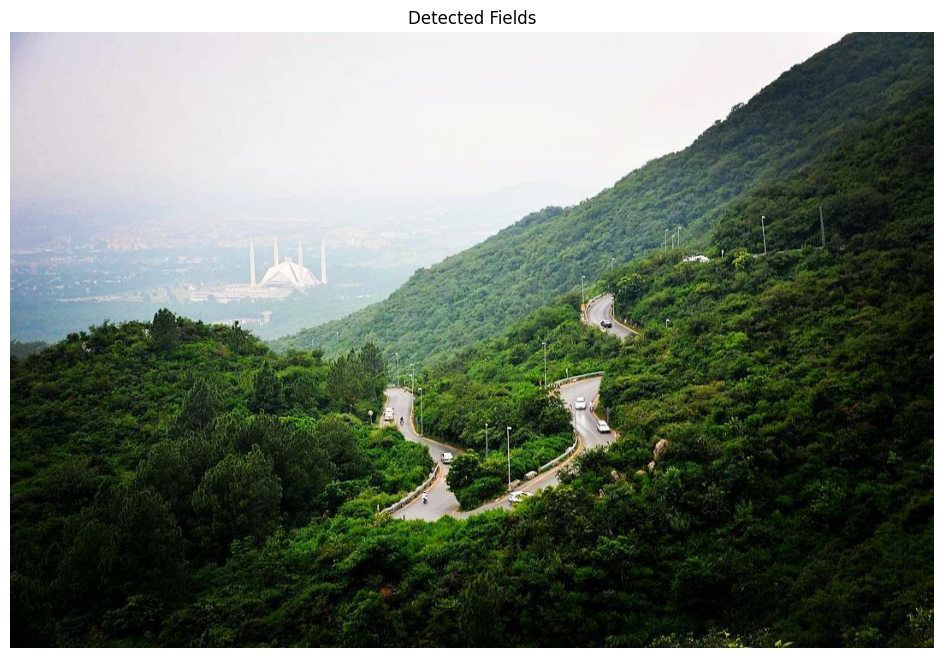

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Thresholds
field_threshold = {
    "prev_policy_no": 0.7,
    "address": 0.6
}

# Function to detect and draw boxes
def getBoxed(img_color, img_gray, template, field_name="policy_no"):
    if template is None:
        print(f"Error: Template for {field_name} not found!")
        return img_color

    h, w = template.shape
    res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
    loc = np.where(res >= field_threshold[field_name])

    for pt in zip(*loc[::-1]):  # switch columns and rows
        cv2.rectangle(img_color, pt, (pt[0]+w, pt[1]+h), (0, 255, 255), 2)
        y = pt[1]-10 if pt[1]-10 > 10 else pt[1]+h+20
        cv2.putText(img_color, field_name, (pt[0], y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,255), 1)
    return img_color

# ---------------- Driver ----------------
# Read original document
img_path = "6.jpeg"
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError(f"{img_path} not found!")

# Convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load templates
template_add = cv2.imread("doc_address.png", 0)
template_prev = cv2.imread("doc_prev_policy.png", 0)

# Detect fields
img = getBoxed(img.copy(), img_gray.copy(), template_add, "address")
img = getBoxed(img.copy(), img_gray.copy(), template_prev, "prev_policy_no")

# ---------------- Safe Display ----------------
# Use matplotlib instead of cv2.imshow to avoid kernel crash
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,8))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Detected Fields")
plt.show()
